#📌 Extracción

In [2]:
import pandas as pd

In [3]:
datos = pd.read_json("TelecomX_Data.json")

In [4]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
df_customer = pd.json_normalize(datos["customer"])

In [6]:
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [7]:
df_phone = pd.json_normalize(datos["phone"])

In [8]:
df_internet = pd.json_normalize(datos["internet"])

In [9]:
df_account = pd.json_normalize(datos["account"])

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [11]:
datos.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

#🔧 Transformación

In [12]:
df_base = pd.DataFrame(datos)[['customerID', 'Churn']]

In [13]:
df_final = pd.concat([df_base, df_customer, df_phone, df_internet, df_account], axis=1)

In [14]:
print(df_final.head())

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [15]:
print(df_final.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


In [16]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

In [17]:
print(f"Valores nulos en Total: {df_final['Charges.Total'].isnull().sum()}")

Valores nulos en Total: 11


In [18]:
df_final['Charges.Total'] = df_final['Charges.Total'].fillna(0)

In [19]:
print(f"Nulos restantes: {df_final['Charges.Total'].isnull().sum()}")

Nulos restantes: 0


In [20]:
print(df_final['Churn'].unique())

['No' 'Yes' '']


In [21]:
df_final['Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

In [23]:
print(df_final['gender'].unique())

['Female' 'Male']


In [24]:
df_final['gender'] = df_final['gender'].map({'Female': 1, 'Male': 0})

In [25]:
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

In [28]:
print(df_final[['Charges.Monthly', 'Cuentas_Diarias']].head())

   Charges.Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80


In [27]:
df_final['Cuentas_Diarias'] = df_final['Cuentas_Diarias'].round(2)

#📊 Carga y análisis

In [29]:
columnas_numericas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

In [30]:
analisis_stats = df_final[columnas_numericas].describe()

In [31]:
print("--- Análisis Estadístico Descriptivo ---")
print(analisis_stats)

--- Análisis Estadístico Descriptivo ---
            tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7267.000000      7267.000000    7267.000000      7267.000000
mean     32.346498        64.720098    2277.182035         2.157292
std      24.571773        30.129572    2268.648587         1.004407
min       0.000000        18.250000       0.000000         0.610000
25%       9.000000        35.425000     396.200000         1.180000
50%      29.000000        70.300000    1389.200000         2.340000
75%      55.000000        89.875000    3778.525000         2.995000
max      72.000000       118.750000    8684.800000         3.960000


In [32]:
import matplotlib.pyplot as plt

In [33]:
churn_data = df_final['Churn'].value_counts()
labels = churn_data.index
values = churn_data.values

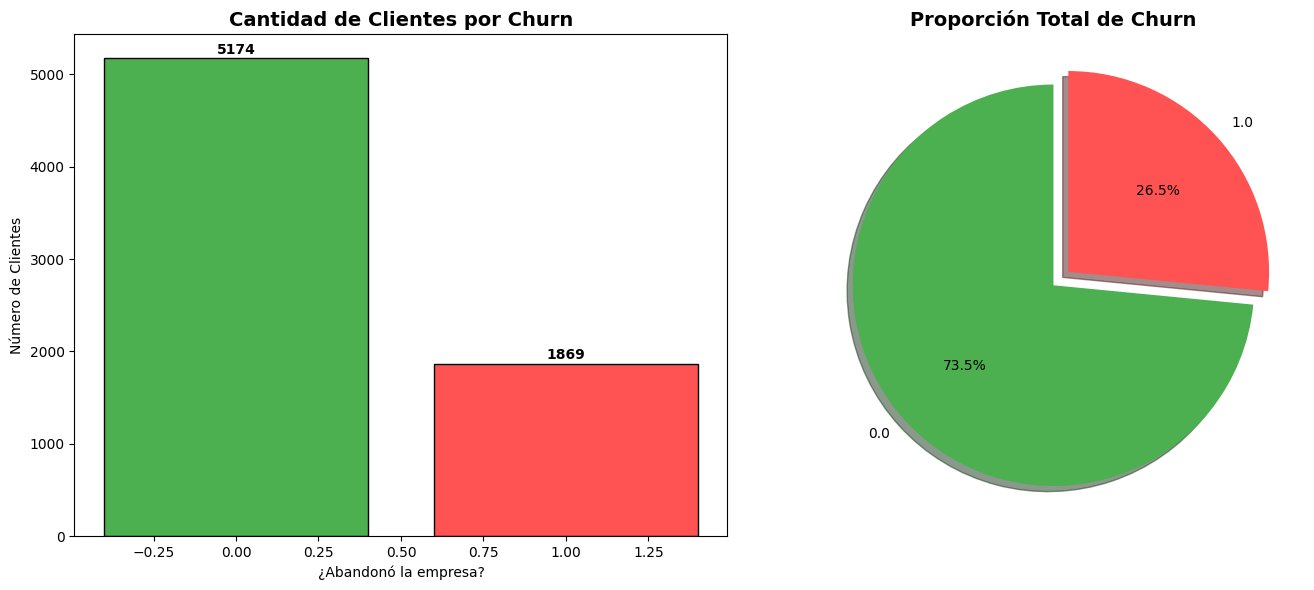

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colores = ['#4CAF50', '#FF5252']
ax1.bar(labels, values, color=colores, edgecolor='black')
ax1.set_title('Cantidad de Clientes por Churn', fontsize=14, fontweight='bold')
ax1.set_xlabel('¿Abandonó la empresa?')
ax1.set_ylabel('Número de Clientes')

for i, v in enumerate(values):
    ax1.text(i, v + 50, str(v), ha='center', fontweight='bold')

ax2.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=colores, explode=(0, 0.1), shadow=True)
ax2.set_title('Proporción Total de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

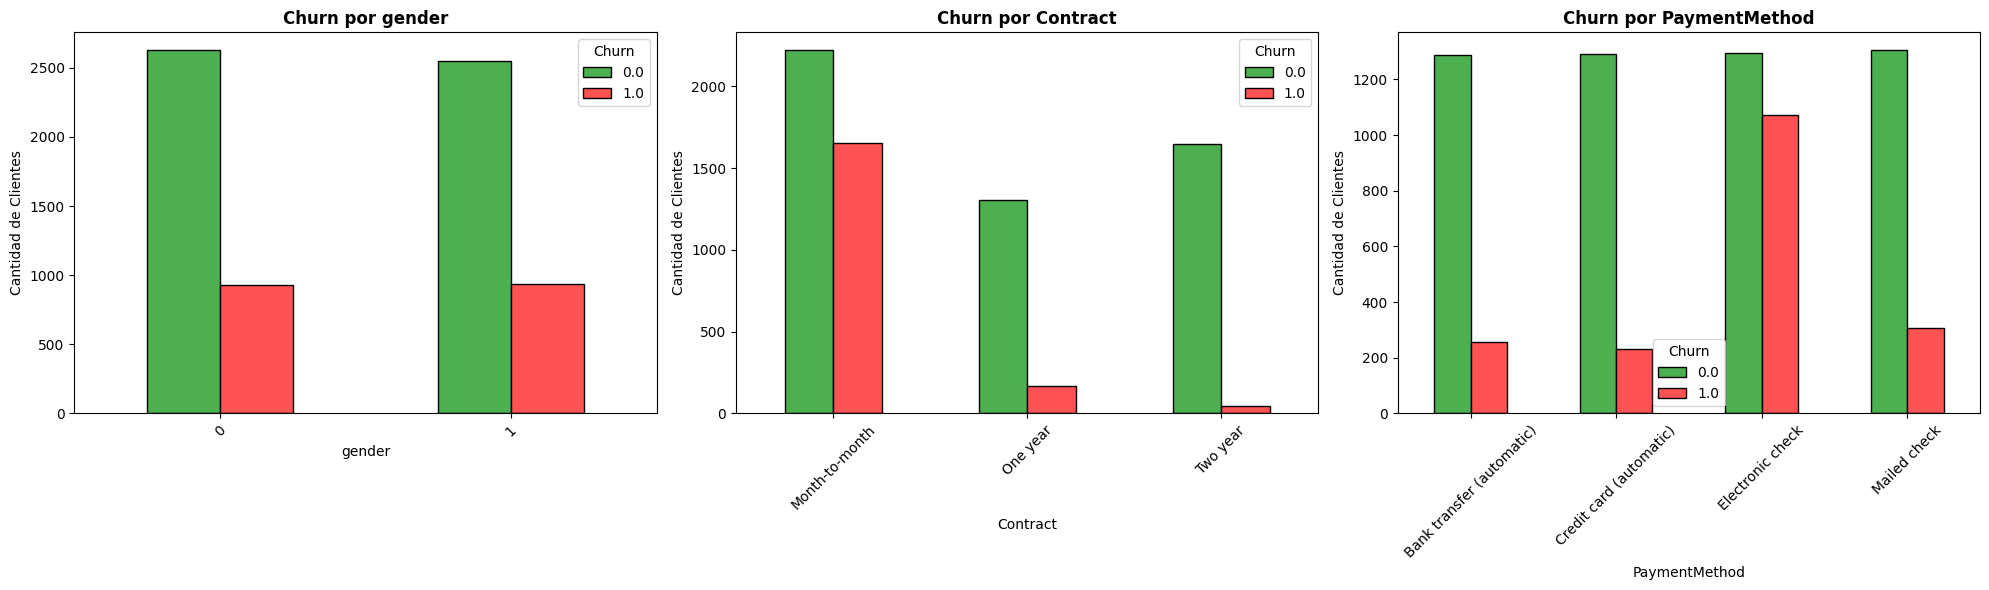

In [37]:
import matplotlib.pyplot as plt

variables = ['gender', 'Contract', 'PaymentMethod']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(variables):
    cross_tab = pd.crosstab(df_final[col], df_final['Churn'])
    
    cross_tab.plot(kind='bar', ax=axes[i], color=['#4CAF50', '#FF5252'], edgecolor='black')
    
    axes[i].set_title(f'Churn por {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].legend(title='Churn')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#📄Informe final

# **Informe Final: Análisis de Evasión de Clientes (Churn) - TelecomX**

## **Introducción**
*El objetivo de este análisis es comprender los factores que impulsan la evasión de clientes (Churn) en TelecomX. El Churn es una métrica crítica para cualquier empresa de servicios, ya que captar un nuevo cliente es significativamente más costoso que retener a uno actual. A través de este estudio, buscamos identificar patrones en el comportamiento de los clientes que nos permitan predecir y prevenir su salida.*

## **Limpieza y Tratamiento de Datos**
1. *El proceso de preparación de los datos se dividió en las siguientes etapas técnicas:*

2. *Importación y Normalización: Se cargó un archivo JSON con estructuras anidadas. Se utilizó pd.json_normalize para aplanar las ramas de customer, phone, internet y account, consolidándolas en un único DataFrame.*

3. *Tratamiento de Nulos: Se detectaron 11 valores nulos en la columna Charges.Total. Al identificar que correspondían a clientes con antigüedad (tenure) de 0 meses, se imputaron con el valor 0.*

4. *Conversión de Tipos: Se transformaron las columnas de cargos de texto a tipo numérico (float) para permitir cálculos estadísticos.*

5. *Ingeniería de Características: Se creó la métrica "Cuentas_Diarias", dividiendo el cargo mensual por 30, para obtener una visión detallada del gasto por cliente.*

## **Análisis Exploratorio de Datos (EDA)**
- *A través de las visualizaciones (Gráficos de Barras y Gráficos de Torta), identificamos los siguientes patrones:*

- *Distribución del Churn: La tasa de abandono general es del 26.5%.*

- *El Factor Contrato: Los clientes con contratos mes a mes representan la gran mayoría de las bajas. Aquellos con contratos de 1 o 2 años muestran una lealtad significativamente mayor.*

- *Antigüedad: Existe un "periodo de riesgo" en los primeros 6 a 12 meses. Si el cliente supera el primer año de servicio, la probabilidad de abandono cae drásticamente.*

- *Cargos Financieros: Los clientes que cancelan suelen tener cargos mensuales más altos en promedio que los que permanecen, lo que sugiere una sensibilidad al precio o una mala relación costo-beneficio.*

## **Conclusiones e Insights**
1. *Vulnerabilidad Inicial: La empresa pierde a sus clientes antes de que estos generen un retorno de inversión positivo (en los primeros meses).*

2. *Método de Pago Electrónico: Se observó una correlación inusual entre el uso de "Electronic Check" y el Churn, lo que podría indicar fricciones en el proceso de pago o el perfil de cliente que elige este método.*

3. *Fidelización por Contrato: El compromiso a largo plazo es el mejor predictor de permanencia.*

## **Recomendaciones**
- *Basado en los datos, se sugieren las siguientes estrategias:*

- *Incentivos de Migración de Contrato: Ofrecer descuentos o beneficios adicionales (como mayor velocidad de internet) a los clientes "mes a mes" para que migren a contratos de un año.*

- *Programa de Bienvenida (Onboarding): Reforzar la atención al cliente y el soporte técnico durante los primeros 3 meses de servicio para reducir la alta tasa de abandono temprana.*

- *Revisión de Precios en Fibra Óptica: Dado que los clientes que se van tienen cargos altos, se recomienda lanzar paquetes intermedios para aquellos que consideran el servicio actual demasiado costoso.*

- *Promoción de Pagos Automáticos: Ofrecer un pequeño bono o descuento si el cliente cambia de "Cheque electrónico" a "Tarjeta de crédito" o "Transferencia automática" para reducir la volatilidad.*